In [1]:
import numpy as np
import pandas as pd

In [2]:
#load csv file
Train = pd.read_csv("train_E6oV3lV.csv")
data=Train
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
data['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [4]:
import seaborn as sns
ax=sns.countplot(data.label)

In [5]:
# removing usernames from tweet

data['new_tweet'] = data.tweet.str.replace('@user', '')
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [6]:
#Removing Punctuations, Numbers, and Special Characters
#[a-zA-Z] = Any single character in the range a-z or A-Z
# ^ = Start of line 
# $ = End of line 

data['new_tweet'] = data['new_tweet'].str.replace("[^a-zA-Z#]", " ")
data['new_tweet'] = data['new_tweet'].str.replace("#", "")
data.head()


,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause the...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [7]:
# get most common words in training dataset
from collections import Counter 
all_words = []
for line in list(data['new_tweet']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
a=Counter(all_words).most_common(10)
a

[('the', 10238),
 ('to', 9866),
 ('i', 7622),
 ('a', 6540),
 ('you', 5949),
 ('and', 4945),
 ('in', 4704),
 ('for', 4510),
 ('of', 4261),
 ('is', 4196)]

In [8]:
#tokenization
data['new_tweet'] = data['new_tweet'].apply(lambda x: x.split())
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunctional, and, is, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thanks, for, lyft, credit, i, can, t, use, ca..."
2,3,0,bihday your majesty,"[bihday, your, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,factsguide: society now #motivation,"[factsguide, society, now, motivation]"


In [9]:
#stemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

data['new_tweet']= data['new_tweet'].apply(lambda x: [stemmer.stem(i) for i in x])
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunct, and, is, so, s..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thank, for, lyft, credit, i, can, t, use, cau..."
2,3,0,bihday your majesty,"[bihday, your, majesti]"
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,factsguide: society now #motivation,"[factsguid, societi, now, motiv]"


In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

#stopwords = set(stopwords.words('english'))
stopwords = nltk.corpus.stopwords.words('english')



In [12]:
newStopWords = ['u','go','got','via','or','ur','us','in','i','let','the','to','is','amp','make','one','day','days','get']
stopwords.extend(newStopWords)


In [13]:
import string 

def process(text):
    # Check characters to see if they are in punctuation
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    # Join the characters to form the string.
    nopunc = " ".join(nopunc)
    # remove any stopwords if present
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords]
    

In [14]:
data['new_tweet'] = data['new_tweet'].apply(process) 
data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[run, dysfunct, selfish, kid, drag, father]"
1,2,0,@user @user thanks for #lyft credit i can't us...,"[pdx, getthank, van, wheelchair, lyft, credit,..."
2,3,0,bihday your majesty,"[bihday, majesti]"
3,4,0,#model i love u take with u all the time in ...,"[time, take, love, model]"
4,5,0,factsguide: society now #motivation,"[societi, factsguid, motiv]"


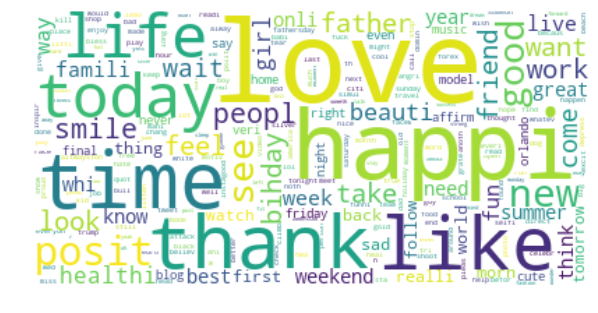

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# split sentences to get individual words
words = []
for line in data['new_tweet']: 
    words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
   ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
def string (text):
    to_return=""
    for i in list(text):
        to_return += str(i) + " "
    to_return = to_return[:-1]
    
    return to_return
    
       
data['new_tweet'] = data['new_tweet'].apply(string)
data.head()  

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,run dysfunct selfish kid drag father
1,2,0,@user @user thanks for #lyft credit i can't us...,pdx getthank van wheelchair lyft credit caus d...
2,3,0,bihday your majesty,bihday majesti
3,4,0,#model i love u take with u all the time in ...,time take love model
4,5,0,factsguide: society now #motivation,societi factsguid motiv


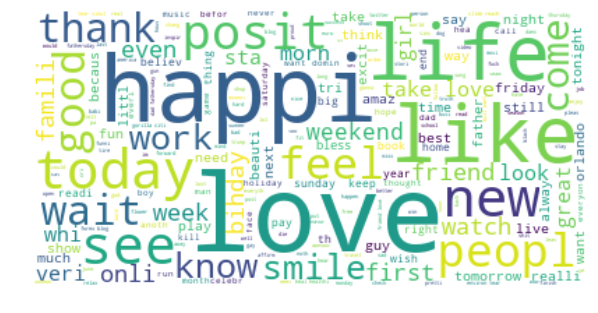

In [17]:
positive = [r for r in data['new_tweet'][data['label']==0]]
pos = ''.join(positive)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
   ).generate(pos)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

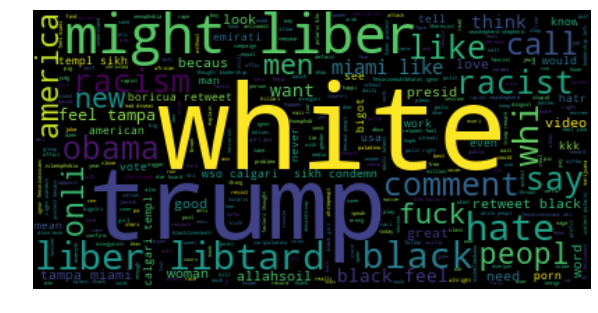

In [19]:
negative = [r for r in data['new_tweet'][data['label']==1]]
neg = ''.join(negative)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='black',
    max_words=2000,
    stopwords=stopwords
   ).generate(neg)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Bag of words 

In [20]:
data.drop(["id","tweet" ],axis=1,inplace=True)
data.head()

,label,new_tweet
0,0,run dysfunct selfish kid drag father
1,0,pdx getthank van wheelchair lyft credit caus d...
2,0,bihday majesti
3,0,time take love model
4,0,societi factsguid motiv


In [23]:
#Split data into training and testing sets 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data["new_tweet"], 
                                                    data["label"], test_size = 0.2, random_state = 42)

print("training set :",x_train.shape,y_train.shape)
print("testing set :",x_test.shape,y_test.shape)

training set : (25569,) (25569,)
testing set : (6393,) (6393,)


In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)


In [25]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

print(x_train_counts.shape)
print(x_train_tfidf.shape)

(25569, 27304)
(25569, 27304)


In [26]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print(x_test_counts.shape)
print(x_test_tfidf.shape)

(6393, 27304)
(6393, 27304)


### Model building

#### Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train_tfidf,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
predictions = model.predict(x_test_tfidf)

In [29]:
#Accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

96.15204129516658

In [30]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,predictions)

array([[5898,   39],
       [ 207,  249]], dtype=int64)

In [31]:
#f1-score
f1_score(y_test,predictions)

0.6693548387096774

In [32]:
predictions

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=400 )
logmodel.fit(x_train_tfidf,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=400, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
log_predictions = logmodel.predict(x_test_tfidf)

In [35]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,log_predictions)

array([[5925,   12],
       [ 308,  148]], dtype=int64)

In [36]:
f1_score(y_test,log_predictions)

0.48051948051948046

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,log_predictions)*100

94.99452526200531

### Gradient Boosting Regressor

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

alg= GradientBoostingRegressor(n_estimators= 550, learning_rate= 0.1, max_depth= 3)
alg.fit(x_train_tfidf,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=550, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
alg_predictions = logmodel.predict(x_test_tfidf)

In [40]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,alg_predictions)

array([[5925,   12],
       [ 308,  148]], dtype=int64)

In [41]:
f1_score(y_test,alg_predictions)

0.48051948051948046

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,alg_predictions)*100

94.99452526200531